# Time Series Forecasting Without Exogeneous Using Pycaret

# Install Pycaret Library

In [1]:
!pip install pycaret

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Kaggle's Electric Production dataset - https://www.kaggle.com/datasets/kandij/electric-production

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DM-Assignment-Dataset/TS007-Electric_Production.csv")
df

,Date,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [2]:
df=df.rename(columns={"IPG2211A2N": "Production"})
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
df

,Date,Production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [3]:
df.columns

Index(['Date', 'Production'], dtype='object')

# Visualisation

<Axes: xlabel='Date'>

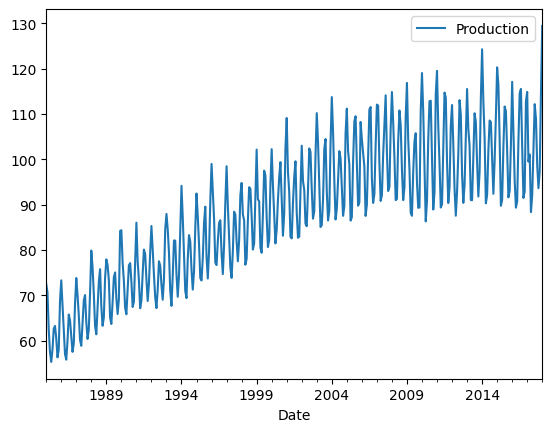

In [5]:
df.plot(x="Date",y="Production")

# Model Build Using Pycaret

In [8]:
# import pycaret time series and init setup
from pycaret.time_series import *
ts_setup = setup(df, target = 'Production', fh = 12, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Production
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(397, 2)"
5,Transformed data shape,"(397, 2)"
6,Transformed train set shape,"(385, 2)"
7,Transformed test set shape,"(12, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [9]:
best_model = compare_models(sort='MAPE')  # MAPE is Mean Absolute Percentage Error

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,0.9595,1.0411,2.6796,3.6629,0.0253,0.0252,0.8406,0.0833
stlf,STLF,1.2498,1.1931,3.4920,4.1998,0.0333,0.0330,0.7968,0.0767
croston,Croston,2.8678,2.6626,8.0142,9.3753,0.0795,0.0781,-0.0123,0.0267
grand_means,Grand Means Forecaster,5.5388,5.1370,15.4888,18.0934,0.1434,0.1583,-2.8226,0.0433
naive,Naive Forecaster,6.2956,5.6747,17.6139,19.9942,0.1808,0.1611,-3.7942,1.6867


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [10]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,397.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,88.847218
3,Summary,Statistics,Transformed,Median,,89.7795
4,Summary,Statistics,Transformed,Standard Deviation,,15.387834
5,Summary,Statistics,Transformed,Variance,,236.785425
6,Summary,Statistics,Transformed,Kurtosis,,-0.694201
7,Summary,Statistics,Transformed,Skewness,,-0.073096
8,Summary,Statistics,Transformed,# Distinct Values,,397.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",4673.514604


# Analyse The Model

In [11]:
plot_model(best_model, plot = 'forecast')

In [13]:
# plot forecast for 36 months in future
plot_model(best_model, plot = 'forecast', data_kwargs = {'fh' : 36})

# Save The Model

In [15]:
final_model = finalize_model(best_model)
save_model(final_model, 'final_electric_production_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 NaiveForecaster(sp=12))]))]))]))]),
 'final_electric_production_model.pkl')

# Test The Model

In [17]:
holdout_pred = predict_model(best_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Seasonal Naive Forecaster,1.5835,1.6106,4.4385,5.7470,0.0412,0.0415,0.7254


In [18]:
holdout_pred.head()

,y_pred
385,106.6688
386,95.3548
387,89.3254
388,90.7369
389,104.0375


# Load The Model

In [19]:
# load pipeline
loaded_best_pipeline = load_model('final_electric_production_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ForecastingPipeline(steps=[('forecaster',
                                                                                            TransformedTargetForecaster(steps=[('model',
                                                                                                                                NaiveForecaster(sp=12))]))]))]))])